# Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the requests Library¶

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
btc_price = requests.get(btc_url).json()
btc_price = btc_price["data"]["1"]["quotes"]["USD"]["price"]

# Fetch current ETH price
eth_price = requests.get(eth_url).json()
eth_price = eth_price["data"]["1027"]["quotes"]["USD"]["price"]

# Compute current value of my crpto
my_btc_value = btc_price * my_btc
my_eth_value = eth_price * my_eth

# Print current crypto wallet balance
print(f"The current value of the {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of the  {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of the 1.2 BTC is $45331.20
The current value of the  5.3 ETH is $13540.44


### Collect Investments Data Using Alpaca: SPY (stocks) and AGG (bonds)

In [6]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [8]:
# Format current date as ISO format
start_date = pd.Timestamp("2021-06-09", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for AGG and SPY
df_ticker = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
).df

# Preview DataFrame
df_ticker

AGG                                      SPY  \
                             open    high     low   close   volume    open   
time                                                                         
2021-06-09 00:00:00-04:00  115.43  115.43  114.97  115.05  3418086  423.18   

                                                             
                             high     low   close    volume  
time                                                         
2021-06-09 00:00:00-04:00  423.26  421.41  421.62  38368598

In [9]:
# Pick AGG and SPY close prices
agg_close_price = df_ticker["AGG"]["close"][0]
spy_close_price = df_ticker["SPY"]["close"][0]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $115.05
Current SPY closing price: $421.62


In [10]:
# Compute the current value of shares
my_agg_value = agg_close_price * my_agg
my_spy_value = spy_close_price * my_spy

# Print current value of share
print(f"The current value of the {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of the {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of the 50 SPY shares is $21081.00
The current value of the 200 AGG shares is $23010.00


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
df_savings = pd.DataFrame([
    my_btc_value + my_eth_value,
    my_agg_value + my_spy_value
],
    columns=["amount"],
    index=["crypto", "shares"]
)

# Display savings DataFrame
display(df_savings)

,amount
crypto,58871.64
shares,44091.00


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

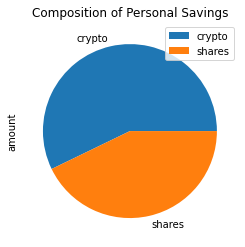

In [12]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Composition of Personal Savings")

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_amount = df_savings["amount"].sum()
total_amount

# Validate saving health
if total_amount > emergency_fund:
    print(f"Congratulations! You have enough money in your emergency fund.")
elif total_amount == emergency_fund:
    print(f"Oh! Your savings is equal to your emergency fund.")
else:
    print(f"Sorry! You don't have enough money in your emergency fund.")

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-06-09', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-06-09', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Display sample data
df_stock_data.head()

AGG                                        SPY  \
                             open      high     low   close   volume    open   
time                                                                           
2021-01-15 00:00:00-05:00  117.34  117.3600  117.18  117.26  4776104  376.72   
2021-01-19 00:00:00-05:00  117.27  117.4200  117.22  117.41  5057257  378.34   
2021-01-20 00:00:00-05:00  117.35  117.4300  117.31  117.40  3877734  381.11   
2021-01-21 00:00:00-05:00  117.22  117.2985  117.14  117.26  5801029  384.49   
2021-01-22 00:00:00-05:00  117.29  117.3200  117.19  117.26  3469745  382.25   

                                                                
                               high      low   close    volume  
time                                                            
2021-01-15 00:00:00-05:00  377.5800  373.700  375.68  78405054  
2021-01-19 00:00:00-05:00  379.2300  376.750  378.63  42257108  
2021-01-20 00:00:00-05:00  384.7900  380.690  383.86  53064901  
2021-01-21 00:00:00-05:00  384.9500  383.250  384.20  41800991  
2021-01-22 00:00:00-05:00  384.1256  381.835  382.86  39108239

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [17]:
# Printing the simulation input data
MC_thirtyyear.portfolio_data.head()

AGG                                     \
                             open      high     low   close   volume   
time                                                                   
2021-01-15 00:00:00-05:00  117.34  117.3600  117.18  117.26  4776104   
2021-01-19 00:00:00-05:00  117.27  117.4200  117.22  117.41  5057257   
2021-01-20 00:00:00-05:00  117.35  117.4300  117.31  117.40  3877734   
2021-01-21 00:00:00-05:00  117.22  117.2985  117.14  117.26  5801029   
2021-01-22 00:00:00-05:00  117.29  117.3200  117.19  117.26  3469745   

                                           SPY                             \
                          daily_return    open      high      low   close   
time                                                                        
2021-01-15 00:00:00-05:00          NaN  376.72  377.5800  373.700  375.68   
2021-01-19 00:00:00-05:00     0.001279  378.34  379.2300  376.750  378.63   
2021-01-20 00:00:00-05:00    -0.000085  381.11  384.7900  380.690  383.86   
2021-01-21 00:00:00-05:00    -0.001193  384.49  384.9500  383.250  384.20   
2021-01-22 00:00:00-05:00     0.000000  382.25  384.1256  381.835  382.86   

                                                  
                             volume daily_return  
time                                              
2021-01-15 00:00:00-05:00  78405054          NaN  
2021-01-19 00:00:00-05:00  42257108     0.007852  
2021-01-20 00:00:00-05:00  53064901     0.013813  
2021-01-21 00:00:00-05:00  41800991     0.000886  
2021-01-22 00:00:00-05:00  39108239    -0.003488

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996766,1.005062,0.996136,1.001095,1.001456,1.001829,0.999987,0.995697,0.993983,0.987529,...,1.002944,1.004435,1.009148,1.011414,1.003545,1.008858,1.000861,1.001819,1.002207,1.002863
2,1.000850,1.005021,0.992803,0.989160,1.007409,1.004591,1.000695,0.998604,0.995479,0.987237,...,1.000639,1.011838,1.018157,1.006855,1.012956,0.995852,1.004217,1.001682,1.000188,1.002519
3,1.001452,1.000354,0.975866,0.982845,0.998825,1.010244,1.008075,1.001736,0.991626,0.988719,...,1.007248,1.019587,1.027030,1.003527,1.008077,0.998013,0.997955,0.999576,1.005167,1.002590
4,1.007220,1.000246,0.973736,0.988217,0.994256,1.011903,1.000982,1.007315,0.994815,0.987287,...,1.004971,1.022187,1.033748,1.005671,1.011182,1.001192,0.996088,0.999902,1.006271,0.993126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,162.389894,61.866238,82.094045,177.939237,142.704274,110.978475,70.720328,182.150918,136.391044,111.484535,...,95.223259,75.478657,115.709215,172.707659,242.175072,141.217708,100.823461,211.205713,172.460484,61.223205
7557,162.216169,62.081241,82.143195,177.406272,142.291213,111.137715,70.833938,181.230092,136.667022,111.378566,...,95.322392,74.840727,116.002390,172.974168,242.006876,141.669548,102.385322,211.013617,172.199955,61.174076
7558,162.376272,62.236499,82.214658,177.714078,142.365197,111.004560,71.362838,181.791082,136.673965,110.673551,...,95.452742,75.464596,114.938306,173.726868,244.073358,141.643359,102.342674,210.353030,172.975594,61.798053
7559,161.589059,62.379906,82.745650,178.478772,143.326053,111.505534,71.663703,181.853834,136.469459,110.886702,...,95.449283,75.776725,114.762300,173.201473,245.026685,141.277251,102.782038,210.783726,173.110551,61.908872


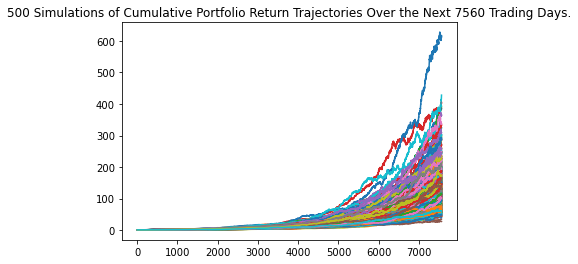

In [19]:
# Plot simulation outcomes
line_plot = MC_thirtyyear.plot_simulation()

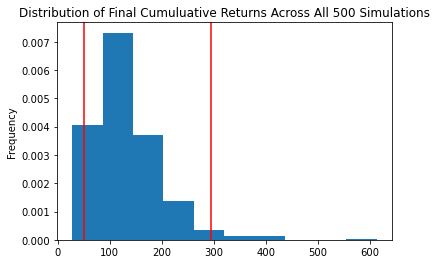

In [20]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirtyyear.plot_distribution()

### Retirement Analysis

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
SS = MC_thirtyyear.summarize_cumulative_return()

# Print summary statistics
SS

count           500.000000
mean            133.040841
std              65.826462
min              27.684645
25%              87.623958
50%             119.140013
75%             160.838546
max             612.552747
95% CI Lower     49.804421
95% CI Upper    294.186846
Name: 7560, dtype: float64

### Calculate the expected portfolio return at the 95% lower and upper confidence intervals given the $20,000 initial investment

In [23]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(SS[8]*20000,2)
ci_upper = round(SS[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $996088.41 and $5883736.92


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a 50% increase in the initial investment.

In [24]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(SS[8]*30000,2)
ci_upper = round(SS[9]*30000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $1494132.62 and $8825605.38


## Early Retirement-Optional Challenge

### Five Years Retirement Option

In [25]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [27]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999499,1.002591,1.006825,1.007079,1.004740,0.998436,1.005998,1.004207,0.998907,1.001819,...,1.004330,1.012500,0.995681,1.002578,1.002215,0.998876,1.000344,1.011465,0.998468,0.999208
2,0.998997,0.994990,1.009597,1.006497,1.005642,0.992402,1.007387,1.015378,1.001185,1.010164,...,0.998820,1.016699,0.994852,1.005538,0.999743,0.996988,0.998186,1.013135,0.996462,0.994638
3,1.005229,0.994379,1.011949,1.013358,1.009767,0.993825,1.001578,1.012569,1.014357,1.015716,...,0.999634,1.027654,0.980990,1.005049,1.000571,0.999867,0.996380,1.021262,0.998845,0.992694
4,1.000937,0.999320,1.007081,1.022066,1.009582,1.000842,1.003386,1.017515,1.018053,1.018132,...,1.001795,1.034940,0.981008,1.007134,0.999855,0.996884,0.996473,1.014737,0.987466,0.984886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.972691,2.778467,2.187224,2.129420,2.814178,2.676466,2.497330,1.827303,2.102365,1.707367,...,2.613078,3.197697,1.996603,2.023110,2.004241,2.262256,1.664391,2.262685,2.660655,2.855049
1257,1.962869,2.771541,2.192420,2.131405,2.818284,2.660006,2.511242,1.809730,2.102069,1.691852,...,2.595772,3.156839,2.001696,2.019973,2.001383,2.263481,1.657285,2.261640,2.650588,2.846137
1258,1.966433,2.783726,2.201413,2.139151,2.794680,2.660411,2.514962,1.801756,2.122111,1.695748,...,2.572743,3.136690,2.011327,2.016936,2.002667,2.235760,1.665087,2.259593,2.636311,2.837233
1259,1.939517,2.774840,2.194990,2.122206,2.814312,2.671439,2.520264,1.791154,2.111389,1.709370,...,2.585450,3.138431,1.993614,2.011869,2.003382,2.254894,1.656801,2.269330,2.669590,2.846986


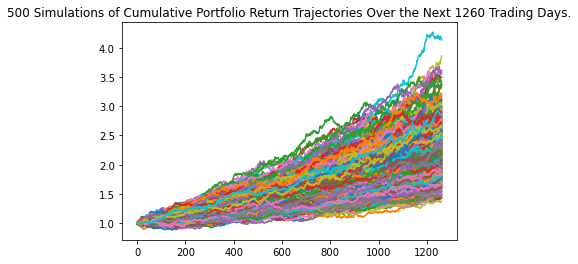

In [28]:
# Plot simulation outcomes
line_plot = MC_fiveyear.plot_simulation()

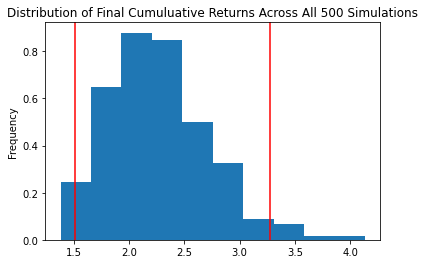

In [29]:
# Plot probability distribution and confidence intervals
dist_plot = MC_fiveyear.plot_distribution()

In [30]:
# Fetch summary statistics from the Monte Carlo simulation results
SS_5 = MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
SS_5

count           500.000000
mean              2.265057
std               0.446026
min               1.379166
25%               1.934332
50%               2.219965
75%               2.543652
max               4.132306
95% CI Lower      1.512045
95% CI Upper      3.272289
Name: 1260, dtype: float64

In [31]:
# Set initial investment
initial_investment = 20000 * 3

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(SS[8]*60000,2)
ci_upper_five = round(SS[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $2988265.24 and $17651210.75


### Ten Years Retirement Option

In [32]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [33]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002186,0.998975,1.003208,1.003016,0.995613,1.004153,1.004480,1.005552,1.004595,0.996283,...,1.003735,1.000640,0.996038,0.993729,0.996942,1.002223,0.995751,0.999355,1.007486,0.997584
2,0.999762,0.999111,1.003684,0.993227,1.007113,1.010552,1.002489,1.007300,1.000552,0.986344,...,1.005240,1.004951,1.000599,0.996714,0.989233,1.010976,1.002594,0.999995,1.003781,1.003231
3,0.995040,0.990314,1.008414,0.996389,1.006036,1.003627,1.003920,1.002974,1.004433,0.994916,...,1.008416,1.003286,0.990551,1.009706,0.987165,1.015875,1.007082,0.995523,1.000742,1.003589
4,1.000451,0.999683,1.011958,0.990357,1.003684,1.005067,1.008963,1.006136,1.002157,0.986289,...,1.013841,0.998286,0.979309,1.024302,0.981427,1.017263,1.000856,0.987440,0.997989,1.007757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,5.951444,7.610957,5.635435,4.881123,3.198067,6.286548,2.807708,5.859633,4.419970,4.996084,...,5.072569,4.108777,6.114644,4.990056,4.248831,4.396785,3.427601,6.122744,7.339149,7.231098
2517,5.911212,7.564510,5.694841,4.809825,3.183786,6.301312,2.813745,5.841918,4.416022,5.000305,...,5.104172,4.115861,6.069756,5.009785,4.236319,4.406590,3.415536,6.145708,7.387618,7.169166
2518,5.938129,7.562287,5.719183,4.835731,3.167433,6.244233,2.826058,5.850259,4.427309,5.024502,...,5.081731,4.099141,6.067081,5.042833,4.249812,4.420742,3.428795,6.187302,7.441977,7.225583
2519,5.918237,7.559143,5.703720,4.879056,3.169604,6.250862,2.817387,5.885862,4.423555,5.076409,...,5.069975,4.117959,6.125907,5.072579,4.235855,4.365839,3.425738,6.179118,7.397841,7.250049


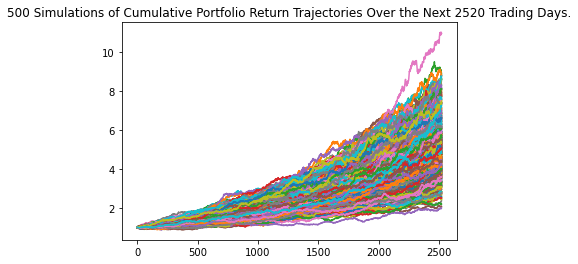

In [36]:
# Plot simulation outcomes
line_plot = MC_tenyear.plot_simulation()

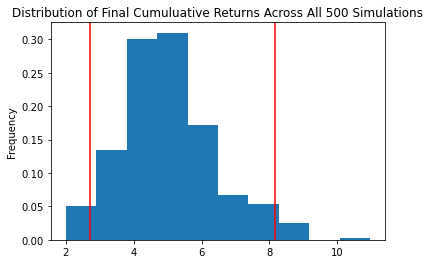

In [35]:
# Plot probability distribution and confidence intervals
dist_plot = MC_tenyear.plot_distribution()

In [37]:
# Fetch summary statistics from the Monte Carlo simulation results
SS_10 = MC_tenyear.summarize_cumulative_return()

# Print summary statistics
SS_10

count           500.000000
mean              5.011203
std               1.359221
min               1.999418
25%               4.042197
50%               4.880636
75%               5.700539
max              10.967975
95% CI Lower      2.723450
95% CI Upper      8.172875
Name: 2520, dtype: float64

In [38]:
# Set initial investment
# Set initial investment
initial_investment = 20000 * 3

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(SS[8]*60000,2)
ci_upper_ten = round(SS[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $2988265.24 and $17651210.75
